In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [3]:
data = pd.read_csv('C:/Users/suraa/Downloads/WMT.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(251, 1)

In [9]:
X_train = []
Y_train = []

for i in range(60, len(trainData)):
    X_train.append(trainData[i-60:i, 0])
    Y_train.append(trainData[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [10]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))#adding the batch size
X_train.shape

(191, 60, 1)

In [11]:
model =Sequential()
model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [12]:
hist = model.fit(X_train, Y_train, epochs = 20, batch_size = 32, verbose = 2)


Epoch 1/20
6/6 - 7s - loss: 0.1716 - 7s/epoch - 1s/step
Epoch 2/20
6/6 - 1s - loss: 0.0510 - 876ms/epoch - 146ms/step
Epoch 3/20
6/6 - 1s - loss: 0.0329 - 722ms/epoch - 120ms/step
Epoch 4/20
6/6 - 1s - loss: 0.0275 - 749ms/epoch - 125ms/step
Epoch 5/20
6/6 - 1s - loss: 0.0220 - 849ms/epoch - 142ms/step
Epoch 6/20
6/6 - 1s - loss: 0.0219 - 747ms/epoch - 125ms/step
Epoch 7/20
6/6 - 1s - loss: 0.0216 - 773ms/epoch - 129ms/step
Epoch 8/20
6/6 - 1s - loss: 0.0183 - 826ms/epoch - 138ms/step
Epoch 9/20
6/6 - 1s - loss: 0.0187 - 735ms/epoch - 122ms/step
Epoch 10/20
6/6 - 1s - loss: 0.0177 - 912ms/epoch - 152ms/step
Epoch 11/20
6/6 - 1s - loss: 0.0178 - 802ms/epoch - 134ms/step
Epoch 12/20
6/6 - 1s - loss: 0.0162 - 841ms/epoch - 140ms/step
Epoch 13/20
6/6 - 1s - loss: 0.0181 - 835ms/epoch - 139ms/step
Epoch 14/20
6/6 - 1s - loss: 0.0165 - 878ms/epoch - 146ms/step
Epoch 15/20
6/6 - 1s - loss: 0.0179 - 875ms/epoch - 146ms/step
Epoch 16/20
6/6 - 1s - loss: 0.0172 - 844ms/epoch - 141ms/step
Epoch 1

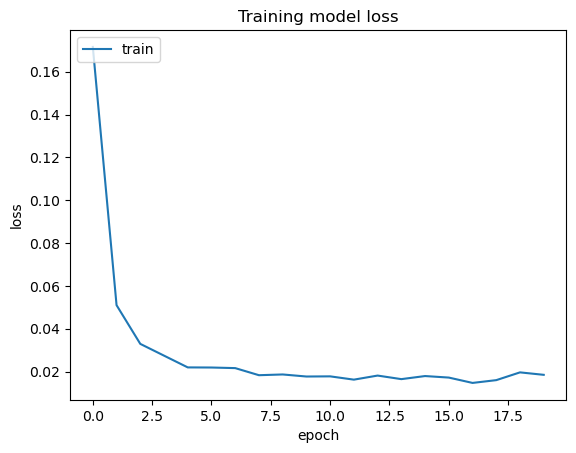

In [13]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trainData)
inputClosing_scaled = scaler.transform(inputClosing)
testData = pd.read_csv('C:/Users/suraa/Downloads/WMT.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(191, 60, 1)

In [19]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 0s 28ms/step


array([[2.5233326],
       [2.5236428],
       [2.5239782],
       [2.524317 ],
       [2.524579 ],
       [2.5245793],
       [2.5243728],
       [2.5241125],
       [2.5238225],
       [2.5235498],
       [2.5232291],
       [2.5228436],
       [2.5225036],
       [2.522219 ],
       [2.5219305],
       [2.521557 ],
       [2.5212443],
       [2.5209   ],
       [2.5205576],
       [2.5202045],
       [2.5198116],
       [2.5193858],
       [2.5189912],
       [2.5185268],
       [2.5180423],
       [2.517541 ],
       [2.5170057],
       [2.5163987],
       [2.5158827],
       [2.515343 ],
       [2.514913 ],
       [2.5144887],
       [2.514076 ],
       [2.513594 ],
       [2.5130742],
       [2.512583 ],
       [2.512165 ],
       [2.5118482],
       [2.5115664],
       [2.511279 ],
       [2.5110278],
       [2.5107925],
       [2.5105302],
       [2.5102828],
       [2.510103 ],
       [2.5099843],
       [2.5099125],
       [2.5098763],
       [2.5098999],
       [2.5099576],


In [17]:
predicted_price = sc.inverse_transform(y_pred)

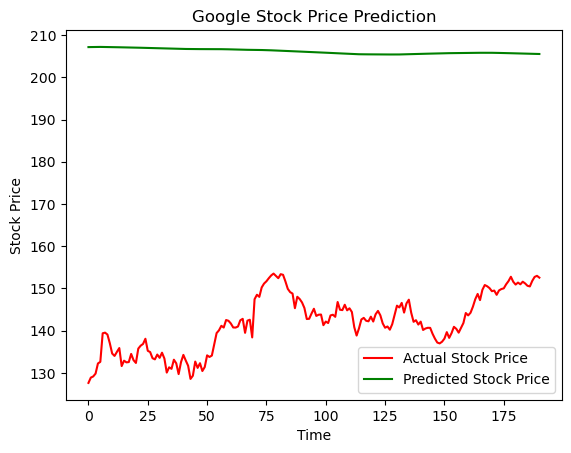

In [20]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()